In [1]:
import pandas as pd

input_dir = '../data/raw/stats/'
output_dir = '../data/raw/'

df_2023 = pd.read_csv(input_dir + '2023_chiba.csv')
df_2023.head()

,(D003-4-2-013)千葉県,/(D003-5-1-001)北海道以外,耕地面積（2024年2月29日公表）_耕地面積【ha】,耕地面積（2024年2月29日公表）_田耕地面積【ha】,耕地面積（2024年2月29日公表）_田耕地面積_田本地面積【ha】,耕地面積（2024年2月29日公表）_畑耕地面積【ha】,水稲（2024年2月29日公表）_作付面積【ha】,水稲（2024年2月29日公表）_10a当たり_収量【kg】,水稲（2024年2月29日公表）_収穫量【t】,麦類（2024年3月29日公表）_1小麦_作付面積【ha】,...,なたね（2024年4月10日公表）_作付面積【ha】,なたね（2024年4月10日公表）_10a当たり_収量【kg】,なたね（2024年4月10日公表）_10a当たり_収量_田【kg】,なたね（2024年4月10日公表）_10a当たり_収量_畑【kg】,なたね（2024年4月10日公表）_収穫量【t】,そば（2024年4月10日公表）_作付面積【ha】,そば（2024年4月10日公表）_10a当たり_収量【kg】,そば（2024年4月10日公表）_10a当たり_収量_田【kg】,そば（2024年4月10日公表）_10a当たり_収量_畑【kg】,そば（2024年4月10日公表）_収穫量【t】
0,成田市,NaN,"6,420","3,830","3,670","2,590","2,320",546,"12,700",47,...,－,－,－,－,－,32,84,X,87,27
1,旭市,NaN,"6,260","3,890","3,760","2,380","2,830",585,"16,600",X,...,－,－,－,－,－,－,－,－,－,－
2,市原市,NaN,"5,250","3,390","3,240","1,860","2,410",529,"12,700",53,...,－,－,－,－,－,－,－,－,－,－
3,香取市,NaN,"11,100","7,710","7,460","3,380","4,930",578,"28,500",59,...,－,－,－,－,－,X,X,－,X,X
4,山武市,NaN,"5,580","2,950","2,850","2,630","2,310",573,"13,200",43,...,－,－,－,－,－,X,X,－,X,X


In [2]:
cols_index = [0,6,7,8]
cols_to_keep = [df_2023.columns[i] for i in cols_index]
df_2023 = df_2023[cols_to_keep]
df_2023.head()

,(D003-4-2-013)千葉県,水稲（2024年2月29日公表）_作付面積【ha】,水稲（2024年2月29日公表）_10a当たり_収量【kg】,水稲（2024年2月29日公表）_収穫量【t】
0,成田市,"2,320",546,"12,700"
1,旭市,"2,830",585,"16,600"
2,市原市,"2,410",529,"12,700"
3,香取市,"4,930",578,"28,500"
4,山武市,"2,310",573,"13,200"


In [3]:
df_2023.insert(loc=0, column='Year', value=[2023, 2023, 2023, 2023, 2023])
df_2023

,Year,(D003-4-2-013)千葉県,水稲（2024年2月29日公表）_作付面積【ha】,水稲（2024年2月29日公表）_10a当たり_収量【kg】,水稲（2024年2月29日公表）_収穫量【t】
0,2023,成田市,"2,320",546,"12,700"
1,2023,旭市,"2,830",585,"16,600"
2,2023,市原市,"2,410",529,"12,700"
3,2023,香取市,"4,930",578,"28,500"
4,2023,山武市,"2,310",573,"13,200"


In [4]:
df_2023.drop(columns=[df_2023.columns[2], df_2023.columns[4]], inplace=True)
df_2023

,Year,(D003-4-2-013)千葉県,水稲（2024年2月29日公表）_10a当たり_収量【kg】
0,2023,成田市,546
1,2023,旭市,585
2,2023,市原市,529
3,2023,香取市,578
4,2023,山武市,573


In [5]:
df_2023.rename(columns={df_2023.columns[1]: 'City', df_2023.columns[2]: 'Yields'}, inplace=True)
df_2023

,Year,City,Yields
0,2023,成田市,546
1,2023,旭市,585
2,2023,市原市,529
3,2023,香取市,578
4,2023,山武市,573


In [6]:
city_id_map = {'成田市': 1, '旭市': 2, '市原市': 3, '香取市': 4, '山武市': 5}

def assign_cityid(city_name: list[str]):
    for city, city_id in city_id_map.items():
        if city in city_name:
            return city_id
    return None

In [7]:
df_2023.insert(loc=1, column='CityId', value=df_2023['City'].apply(assign_cityid))
df_2023

,Year,CityId,City,Yields
0,2023,1,成田市,546
1,2023,2,旭市,585
2,2023,3,市原市,529
3,2023,4,香取市,578
4,2023,5,山武市,573


In [8]:
df_2023.to_csv(output_dir + 'yields_2023_df.csv')

In [9]:
from pandas import DataFrame

def reshape_df(df, index) -> DataFrame:
    """
    df: pandas DataFrame
    index: list of integer
    """
    cols_to_keep = [df.columns[i] for i in index]
    return df[cols_to_keep]

In [10]:
df_2022 = pd.read_csv(input_dir + '2022_chiba.csv')
df_2022.head()

,(D003-4-2-013)千葉県,/(D003-4-1-001)北海道以外,耕地面積（2023年2月28日公表）_耕地面積【ha】,耕地面積（2023年2月28日公表）_田耕地面積【ha】,耕地面積（2023年2月28日公表）_田耕地面積_田本地面積【ha】,耕地面積（2023年2月28日公表）_畑耕地面積【ha】,水稲（2023年2月28日公表）_作付面積【ha】,水稲（2023年2月28日公表）_10a当たり_収量【kg】,水稲（2023年2月28日公表）_収穫量【t】,麦類（2023年3月31日公表）_1小麦_作付面積【ha】,...,なたね（2023年4月14日公表）_作付面積【ha】,なたね（2023年4月14日公表）_10a当たり_収量【kg】,なたね（2023年4月14日公表）_10a当たり_収量_田【kg】,なたね（2023年4月14日公表）_10a当たり_収量_畑【kg】,なたね（2023年4月14日公表）_収穫量【t】,そば（2023年4月14日公表）_作付面積【ha】,そば（2023年4月14日公表）_10a当たり_収量【kg】,そば（2023年4月14日公表）_10a当たり_収量_田【kg】,そば（2023年4月14日公表）_10a当たり_収量_畑【kg】,そば（2023年4月14日公表）_収穫量【t】
0,成田市,NaN,"6,420","3,830","3,670","2,590","2,270",534,"12,100",36,...,－,－,－,－,－,30,84,X,86,25
1,旭市,NaN,"6,270","3,890","3,760","2,380","2,870",573,"16,400",X,...,－,－,－,－,－,－,－,－,－,－
2,市原市,NaN,"5,290","3,430","3,280","1,860","2,420",516,"12,500",58,...,X,X,－,X,X,－,－,－,－,－
3,香取市,NaN,"11,100","7,720","7,460","3,390","4,970",566,"28,100",70,...,－,－,－,－,－,－,－,－,－,－
4,山武市,NaN,"5,640","2,980","2,880","2,660","2,210",561,"12,400",38,...,－,－,－,－,－,X,X,－,X,X


In [11]:
df_2022 = reshape_df(df_2022, [0, 7])
df_2022.head()

,(D003-4-2-013)千葉県,水稲（2023年2月28日公表）_10a当たり_収量【kg】
0,成田市,534
1,旭市,573
2,市原市,516
3,香取市,566
4,山武市,561


In [12]:
df_2022.insert(loc=0, column='Year', value=[2022, 2022, 2022, 2022, 2022])
df_2022

,Year,(D003-4-2-013)千葉県,水稲（2023年2月28日公表）_10a当たり_収量【kg】
0,2022,成田市,534
1,2022,旭市,573
2,2022,市原市,516
3,2022,香取市,566
4,2022,山武市,561


In [13]:
df_2022.rename(columns={df_2022.columns[1]: 'City', df_2022.columns[2]: 'Yields'}, inplace=True)
df_2022


,Year,City,Yields
0,2022,成田市,534
1,2022,旭市,573
2,2022,市原市,516
3,2022,香取市,566
4,2022,山武市,561


In [14]:
df_2022.insert(loc=1, column='CityId', value=df_2022.City.apply(assign_cityid))
df_2022

,Year,CityId,City,Yields
0,2022,1,成田市,534
1,2022,2,旭市,573
2,2022,3,市原市,516
3,2022,4,香取市,566
4,2022,5,山武市,561


In [15]:
df_2022.to_csv(output_dir + 'yields_2022_df.csv')

In [16]:
df_2021 = pd.read_csv(input_dir + '2021_chiba.csv')
df_2021.head()

,(D003_3_2_013)千葉県,/(D003_3_1_001)北海道以外,耕地面積（2022年2月28日公表）_耕地面積【ha】,耕地面積（2022年2月28日公表）_田耕地面積【ha】,耕地面積（2022年2月28日公表）_田耕地面積_田本地面積【ha】,耕地面積（2022年2月28日公表）_畑耕地面積【ha】,水稲（2022年2月28日公表）_作付面積【ha】,水稲（2022年2月28日公表）_10a当たり収量【kg】,水稲（2022年2月28日公表）_収穫量【t】,麦類（2022年３月31日公表）_1小麦_作付面積【ha】,...,なたね（2022年４月11日公表）_作付面積【ha】,なたね（2022年４月11日公表）_10a当たり収量【kg】,なたね（2022年４月11日公表）_10a当たり収量_田【kg】,なたね（2022年４月11日公表）_10a当たり収量_畑【kg】,なたね（2022年４月11日公表）_収穫量【t】,そば（2022年４月11日公表）_作付面積【ha】,そば（2022年４月11日公表）_10a当たり収量【kg】,そば（2022年４月11日公表）_10a当たり収量_田【kg】,そば（2022年４月11日公表）_10a当たり収量_畑【kg】,そば（2022年４月11日公表）_収穫量【t】
0,千葉県_成田市,NaN,"6,470","3,840","3,670","2,630","2,490",545,"13,600",46,...,－,－,－,－,－,27,74,X,76,20
1,千葉県_旭市,NaN,"6,280","3,900","3,770","2,380","3,030",574,"17,400",7,...,－,－,－,－,－,－,－,－,－,－
2,千葉県_市原市,NaN,"5,370","3,470","3,330","1,900","2,500",530,"13,300",59,...,X,X,X,X,X,－,－,－,－,－
3,千葉県_香取市,NaN,"11,100","7,730","7,470","3,400","5,400",568,"30,700",74,...,－,－,－,－,－,X,X,X,X,X
4,千葉県_山武市,NaN,"5,700","3,000","2,900","2,700","2,350",562,"13,200",24,...,－,－,－,－,－,X,X,X,X,X


In [17]:
df_2021 = reshape_df(df_2021, [0,7])
df_2021.head()

,(D003_3_2_013)千葉県,水稲（2022年2月28日公表）_10a当たり収量【kg】
0,千葉県_成田市,545
1,千葉県_旭市,574
2,千葉県_市原市,530
3,千葉県_香取市,568
4,千葉県_山武市,562


In [18]:
df_2021.insert(loc=0, column='Year', value=[2021, 2021, 2021, 2021, 2021])
df_2021.rename(columns={df_2021.columns[1]: 'City', df_2021.columns[2]: 'Yields'}, inplace=True)
df_2021

,Year,City,Yields
0,2021,千葉県_成田市,545
1,2021,千葉県_旭市,574
2,2021,千葉県_市原市,530
3,2021,千葉県_香取市,568
4,2021,千葉県_山武市,562


In [19]:
df_2021.insert(1, 'CityId', df_2021.City.apply(assign_cityid))
df_2021

,Year,CityId,City,Yields
0,2021,1,千葉県_成田市,545
1,2021,2,千葉県_旭市,574
2,2021,3,千葉県_市原市,530
3,2021,4,千葉県_香取市,568
4,2021,5,千葉県_山武市,562


In [20]:
df_07_20 = pd.read_csv(input_dir + '2007-20_chiba.csv')
df_07_20.head()

,時間軸（年次）,市町村,/面積収量収穫量,10a当たり収量【kg】
0,2020年,千葉県成田市,NaN,530
1,2020年,千葉県旭市,NaN,568
2,2020年,千葉県市原市,NaN,524
3,2020年,千葉県香取市,NaN,561
4,2020年,千葉県山武市,NaN,555


In [21]:
df_07_20 = reshape_df(df_07_20, [0,1,3])
df_07_20

,時間軸（年次）,市町村,10a当たり収量【kg】
0,2020年,千葉県成田市,530
1,2020年,千葉県旭市,568
2,2020年,千葉県市原市,524
3,2020年,千葉県香取市,561
4,2020年,千葉県山武市,555
...,...,...,...
65,2007年,千葉県成田市,533
66,2007年,千葉県旭市,556
67,2007年,千葉県市原市,506
68,2007年,千葉県香取市,554


In [22]:
df_07_20.rename(columns={df_07_20.columns[0]: 'Drop', df_07_20.columns[1]: 'City', df_07_20.columns[2]: 'Yields'}, inplace=True)
df_07_20

,Drop,City,Yields
0,2020年,千葉県成田市,530
1,2020年,千葉県旭市,568
2,2020年,千葉県市原市,524
3,2020年,千葉県香取市,561
4,2020年,千葉県山武市,555
...,...,...,...
65,2007年,千葉県成田市,533
66,2007年,千葉県旭市,556
67,2007年,千葉県市原市,506
68,2007年,千葉県香取市,554


In [23]:
year_map = {'2020': 2020, '2019': 2019, '2018': 2018, '2017': 2017, '2016': 2016,
            '2015': 2015, '2014': 2014, '2013': 2013, '2012': 2012, '2011': 2011,
            '2010': 2010, '2009': 2009, '2008': 2008, '2007': 2007, '2006': 2006,
            '2005': 2005, '2004': 2004, '2003': 2003, '2002': 2002, '2001': 2001,
            '2000': 2000, '1999': 1999, '1998': 1998, '1997': 1997, '1996': 1996,
            '1995': 1995,'1994': 1994, '1993': 1993}

def reformat_year(year_list: list[str]):
    for year_str, year_int in year_map.items():
        if year_str in year_list:
            return year_int
    return None
df_07_20.insert(0, 'Year', df_07_20.Drop.apply(reformat_year))
df_07_20.drop(columns=['Drop'], inplace=True)
df_07_20

,Year,City,Yields
0,2020,千葉県成田市,530
1,2020,千葉県旭市,568
2,2020,千葉県市原市,524
3,2020,千葉県香取市,561
4,2020,千葉県山武市,555
...,...,...,...
65,2007,千葉県成田市,533
66,2007,千葉県旭市,556
67,2007,千葉県市原市,506
68,2007,千葉県香取市,554


In [24]:
df_07_20.insert(1, 'CityId', df_07_20.City.apply(assign_cityid))
df_07_20

,Year,CityId,City,Yields
0,2020,1,千葉県成田市,530
1,2020,2,千葉県旭市,568
2,2020,3,千葉県市原市,524
3,2020,4,千葉県香取市,561
4,2020,5,千葉県山武市,555
...,...,...,...,...
65,2007,1,千葉県成田市,533
66,2007,2,千葉県旭市,556
67,2007,3,千葉県市原市,506
68,2007,4,千葉県香取市,554


In [25]:
df_07_20.to_csv(output_dir+'yields_2007-2020_df.csv')

In [26]:
df_93_05 = pd.read_csv(input_dir + '1993-2005_chiba.csv')
df_93_05.head()

,水陸稲種類,市町村（長期累年）,時間軸（年次）（長期累年）,面積収量収穫量,値
0,水稲,千葉県成田市,2005年,10a当たり収量【kg】,549
1,水稲,千葉県成田市,2004年,10a当たり収量【kg】,553
2,水稲,千葉県成田市,2003年,10a当たり収量【kg】,487
3,水稲,千葉県成田市,2002年,10a当たり収量【kg】,527
4,水稲,千葉県成田市,2001年,10a当たり収量【kg】,524


In [27]:
df_93_05 = reshape_df(df_93_05, [1,2,4])
df_93_05.head()


,市町村（長期累年）,時間軸（年次）（長期累年）,値
0,千葉県成田市,2005年,549
1,千葉県成田市,2004年,553
2,千葉県成田市,2003年,487
3,千葉県成田市,2002年,527
4,千葉県成田市,2001年,524


In [28]:
df_93_05.rename(columns={df_93_05.columns[0]: 'City', df_93_05.columns[1]: 'Drop', df_93_05.columns[2]: 'Yields'}, inplace=True)
df_93_05.head(10)

,City,Drop,Yields
0,千葉県成田市,2005年,549
1,千葉県成田市,2004年,553
2,千葉県成田市,2003年,487
3,千葉県成田市,2002年,527
4,千葉県成田市,2001年,524
5,千葉県成田市,2000年,547
6,千葉県成田市,1999年,524
7,千葉県成田市,1998年,473
8,千葉県成田市,1997年,519
9,千葉県成田市,1996年,508


In [29]:
df_93_05.insert(loc=0, column='Year', value=df_93_05.Drop.apply(reformat_year))
df_93_05

,Year,City,Drop,Yields
0,2005,千葉県成田市,2005年,549
1,2004,千葉県成田市,2004年,553
2,2003,千葉県成田市,2003年,487
3,2002,千葉県成田市,2002年,527
4,2001,千葉県成田市,2001年,524
5,2000,千葉県成田市,2000年,547
6,1999,千葉県成田市,1999年,524
7,1998,千葉県成田市,1998年,473
8,1997,千葉県成田市,1997年,519
9,1996,千葉県成田市,1996年,508


In [30]:
df_93_05.drop(columns=[df_93_05.columns[2]], inplace=True)
df_93_05

,Year,City,Yields
0,2005,千葉県成田市,549
1,2004,千葉県成田市,553
2,2003,千葉県成田市,487
3,2002,千葉県成田市,527
4,2001,千葉県成田市,524
5,2000,千葉県成田市,547
6,1999,千葉県成田市,524
7,1998,千葉県成田市,473
8,1997,千葉県成田市,519
9,1996,千葉県成田市,508


In [31]:
df_93_05.insert(1, 'CityId', df_93_05.City.apply(assign_cityid))
df_93_05.head(10)

,Year,CityId,City,Yields
0,2005,1,千葉県成田市,549
1,2004,1,千葉県成田市,553
2,2003,1,千葉県成田市,487
3,2002,1,千葉県成田市,527
4,2001,1,千葉県成田市,524
5,2000,1,千葉県成田市,547
6,1999,1,千葉県成田市,524
7,1998,1,千葉県成田市,473
8,1997,1,千葉県成田市,519
9,1996,1,千葉県成田市,508


In [32]:
df_93_05.to_csv(output_dir+'yields_1993-2006_df.csv')

In [33]:
df_2006 = pd.read_csv(input_dir+'2006_chiba.csv')
df_2006.head(10)

,時間軸（年次）,市町村（2006年）,/面積収量収穫量,10a当たり収量【kg】
0,2006年,千葉県成田市,NaN,508
1,2006年,千葉県旭市,NaN,526
2,2006年,千葉県市原市,NaN,505
3,2006年,千葉県香取市,NaN,514
4,2006年,千葉県山武市,NaN,525


In [34]:
df_2006.drop(columns=df_2006.columns[2], inplace=True)
df_2006

,時間軸（年次）,市町村（2006年）,10a当たり収量【kg】
0,2006年,千葉県成田市,508
1,2006年,千葉県旭市,526
2,2006年,千葉県市原市,505
3,2006年,千葉県香取市,514
4,2006年,千葉県山武市,525


In [35]:
df_2006.rename(columns={df_2006.columns[0]: 'Drop', df_2006.columns[1]: 'City', df_2006.columns[2]: 'Yields'}, inplace=True)
df_2006.head(10)

,Drop,City,Yields
0,2006年,千葉県成田市,508
1,2006年,千葉県旭市,526
2,2006年,千葉県市原市,505
3,2006年,千葉県香取市,514
4,2006年,千葉県山武市,525


In [36]:
df_2006.insert(0, 'Year', df_2006.Drop.apply(reformat_year))
df_2006.insert(2, 'CityId', df_2006.City.apply(assign_cityid))
df_2006

,Year,Drop,CityId,City,Yields
0,2006,2006年,1,千葉県成田市,508
1,2006,2006年,2,千葉県旭市,526
2,2006,2006年,3,千葉県市原市,505
3,2006,2006年,4,千葉県香取市,514
4,2006,2006年,5,千葉県山武市,525


In [37]:
df_2006.drop(columns='Drop', inplace=True)
df_2006

,Year,CityId,City,Yields
0,2006,1,千葉県成田市,508
1,2006,2,千葉県旭市,526
2,2006,3,千葉県市原市,505
3,2006,4,千葉県香取市,514
4,2006,5,千葉県山武市,525


In [38]:
df_2006.to_csv(output_dir+'yields_2006.csv')

In [39]:
df = pd.concat([df_2023, df_2022, df_2021, df_07_20, df_2006, df_93_05])
df.describe()

,Year,CityId,Yields
count,131.000000,131.000000,131.000000
mean,2009.740458,2.725191,538.503817
std,8.571498,1.359035,33.728640
min,1993.000000,1.000000,405.000000
25%,2003.500000,2.000000,520.500000
50%,2010.000000,3.000000,542.000000
75%,2017.000000,4.000000,563.500000
max,2023.000000,5.000000,598.000000


In [40]:
df.reset_index(inplace=True, drop=True)
df

,Year,CityId,City,Yields
0,2023,1,成田市,546
1,2023,2,旭市,585
2,2023,3,市原市,529
3,2023,4,香取市,578
4,2023,5,山武市,573
...,...,...,...,...
126,1995,3,千葉県市原市,463
127,1994,3,千葉県市原市,490
128,1993,3,千葉県市原市,405
129,2005,4,千葉県香取市,550


In [41]:
city_id_map={1: '成田市', 2: '旭市', 3: '市原市', 4: '香取市', 5: '山武市'}
def id_to_city(input_id: int):
    for id in city_id_map:
        if input_id == id:
            return city_id_map[input_id]
df.City = df.CityId.apply(id_to_city)
df

,Year,CityId,City,Yields
0,2023,1,成田市,546
1,2023,2,旭市,585
2,2023,3,市原市,529
3,2023,4,香取市,578
4,2023,5,山武市,573
...,...,...,...,...
126,1995,3,市原市,463
127,1994,3,市原市,490
128,1993,3,市原市,405
129,2005,4,香取市,550


In [42]:
df = df.sort_values(by=['CityId', 'Year'], ascending=[True, False])
df.reset_index(drop=True, inplace=True)
df

,Year,CityId,City,Yields
0,2023,1,成田市,546
1,2022,1,成田市,534
2,2021,1,成田市,545
3,2020,1,成田市,530
4,2019,1,成田市,521
...,...,...,...,...
126,2009,5,山武市,532
127,2008,5,山武市,586
128,2007,5,山武市,517
129,2006,5,山武市,525


In [43]:
df.Year.interpolate(method='linear', inplace=True)
df.Year

/tmp/ipykernel_1510264/4193598518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Year.interpolate(method='linear', inplace=True)


0      2023
1      2022
2      2021
3      2020
4      2019
       ... 
126    2009
127    2008
128    2007
129    2006
130    2005
Name: Year, Length: 131, dtype: int64

In [44]:
df.to_csv(output_dir+'chiba_yields_df.csv')

In [45]:
pivot_df = df.pivot(columns='Year', index='City', values='Yields')
pivot_df

Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
City,,,,,,,,,,,,,,,,,,,,,
山武市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573.0,554.0,565.0,560.0,555.0,525.0,555.0,562.0,561.0,573.0
市原市,405.0,490.0,463.0,497.0,512.0,466.0,503.0,532.0,494.0,484.0,...,540.0,516.0,517.0,524.0,521.0,508.0,524.0,530.0,516.0,529.0
成田市,425.0,524.0,500.0,508.0,519.0,473.0,524.0,547.0,524.0,527.0,...,559.0,542.0,547.0,537.0,535.0,521.0,530.0,545.0,534.0,546.0
旭市,428.0,569.0,518.0,528.0,554.0,513.0,547.0,573.0,548.0,540.0,...,588.0,565.0,584.0,572.0,567.0,538.0,568.0,574.0,573.0,585.0
香取市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,583.0,555.0,580.0,564.0,560.0,525.0,561.0,568.0,566.0,578.0


In [46]:
pivot_df.to_csv(output_dir+'chiba_yields_df_pivot.csv')

/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26093 (\N{CJK UNIFIED IDEOGRAPH

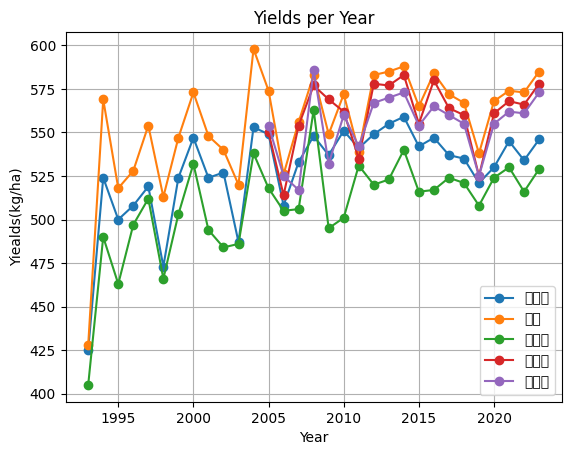

In [47]:
import matplotlib.pyplot as plt
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Year'], city_data['Yields'], marker='o', label=city)
    
plt.title('Yields per Year')
plt.xlabel('Year')
plt.ylabel('Yiealds(kg/ha)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
y_narita = df.loc[df.CityId == 1]
y_asahi = df.loc[df.CityId == 2]
y_ichihara = df.loc[df.CityId == 3]
y_katori = df.loc[df.CityId == 4]
y_sanmu = df.loc[df.CityId == 5]

In [49]:
full_years = pd.DataFrame({'Year': range(1993, 2024)})

katori_with_missing = full_years.merge(y_katori, how='left', on='Year')

sanmu_with_missing = full_years.merge(y_sanmu, how='left', on='Year')  


In [50]:
katori_with_missing.head(10)

,Year,CityId,City,Yields
0,1993,NaN,NaN,NaN
1,1994,NaN,NaN,NaN
2,1995,NaN,NaN,NaN
3,1996,NaN,NaN,NaN
4,1997,NaN,NaN,NaN
5,1998,NaN,NaN,NaN
6,1999,NaN,NaN,NaN
7,2000,NaN,NaN,NaN
8,2001,NaN,NaN,NaN
9,2002,NaN,NaN,NaN


In [51]:
katori_with_missing['CityId'] = 4
katori_with_missing['City'] = '香取市'
katori_with_missing

,Year,CityId,City,Yields
0,1993,4,香取市,NaN
1,1994,4,香取市,NaN
2,1995,4,香取市,NaN
3,1996,4,香取市,NaN
4,1997,4,香取市,NaN
5,1998,4,香取市,NaN
6,1999,4,香取市,NaN
7,2000,4,香取市,NaN
8,2001,4,香取市,NaN
9,2002,4,香取市,NaN


In [52]:
sanmu_with_missing['CityId'] = 5
sanmu_with_missing['City'] = '山武市'
sanmu_with_missing

,Year,CityId,City,Yields
0,1993,5,山武市,NaN
1,1994,5,山武市,NaN
2,1995,5,山武市,NaN
3,1996,5,山武市,NaN
4,1997,5,山武市,NaN
5,1998,5,山武市,NaN
6,1999,5,山武市,NaN
7,2000,5,山武市,NaN
8,2001,5,山武市,NaN
9,2002,5,山武市,NaN


In [53]:
"""1. Normalize yield data for all regions"""

all_regions = pd.pivot_table(df, index='Year', columns='City', values='Yields')

all_regions.head(10)

City,山武市,市原市,成田市,旭市,香取市
Year,,,,,
1993,NaN,405.0,425.0,428.0,NaN
1994,NaN,490.0,524.0,569.0,NaN
1995,NaN,463.0,500.0,518.0,NaN
1996,NaN,497.0,508.0,528.0,NaN
1997,NaN,512.0,519.0,554.0,NaN
1998,NaN,466.0,473.0,513.0,NaN
1999,NaN,503.0,524.0,547.0,NaN
2000,NaN,532.0,547.0,573.0,NaN
2001,NaN,494.0,524.0,548.0,NaN


In [54]:
"""2. Normalize yield data for all regions"""
normalized_regions = all_regions.div(all_regions.mean())
normalized_regions.head(10)

City,山武市,市原市,成田市,旭市,香取市
Year,,,,,
1993,NaN,0.796789,0.804433,0.770634,NaN
1994,NaN,0.964016,0.991818,1.024511,NaN
1995,NaN,0.910897,0.946392,0.932683,NaN
1996,NaN,0.977788,0.961534,0.950688,NaN
1997,NaN,1.007298,0.982354,0.997502,NaN
1998,NaN,0.916799,0.895286,0.923680,NaN
1999,NaN,0.989592,0.991818,0.984899,NaN
2000,NaN,1.046646,1.035352,1.031713,NaN
2001,NaN,0.971886,0.991818,0.986699,NaN


In [55]:
not_missing_regions = normalized_regions.drop(['山武市', '香取市'], axis=1)
not_missing_regions.head(10)

City,市原市,成田市,旭市
Year,,,
1993,0.796789,0.804433,0.770634
1994,0.964016,0.991818,1.024511
1995,0.910897,0.946392,0.932683
1996,0.977788,0.961534,0.950688
1997,1.007298,0.982354,0.997502
1998,0.916799,0.895286,0.923680
1999,0.989592,0.991818,0.984899
2000,1.046646,1.035352,1.031713
2001,0.971886,0.991818,0.986699


In [56]:
"""3. Calculate trend for not missing regions"""
reference_trend = not_missing_regions.mean(axis=1)
reference_trend

Year
1993    0.790618
1994    0.993448
1995    0.929990
1996    0.963337
1997    0.995718
1998    0.911922
1999    0.988770
2000    1.037904
2001    0.983468
2002    0.974001
2003    0.938072
2004    1.060629
2005    1.030585
2006    0.967383
2007    1.001817
2008    1.064866
2009    0.992926
2010    1.019498
2011    1.013056
2012    1.037298
2013    1.044251
2014    1.059724
2015    1.019455
2016    1.034669
2017    1.025748
2018    1.019518
2019    0.984754
2020    1.018931
2021    1.035930
2022    1.019209
2023    1.042508
dtype: float64

In [57]:
"""4. Learn reference trend"""
sanmu_valid_years = normalized_regions['山武市'].dropna().index
sanmu_scale_factors = normalized_regions.loc[sanmu_valid_years, '山武市'] / reference_trend[sanmu_valid_years]
sanmu_average_scale_factor = sanmu_scale_factors.mean()

katori_valid_years = normalized_regions['香取市'].dropna().index
katori_scale_factors = normalized_regions.loc[katori_valid_years, '香取市'] / reference_trend[katori_valid_years]
katori_average_scale_factor = katori_scale_factors.mean()

In [58]:
"""5. Predict missing values with reference trend and scale factors"""

sanmu_missing_years = normalized_regions['山武市'].isna()
katori_missing_years = normalized_regions['香取市'].isna()

estimated_normalized_values_sanmu = reference_trend[sanmu_missing_years] * sanmu_average_scale_factor
estimated_normalized_values_katori = reference_trend[katori_missing_years] * katori_average_scale_factor

In [59]:
"""6. Denormalize predicted values"""

estimated_actual_values_sanmu = estimated_normalized_values_sanmu * all_regions['山武市'].mean()
estimated_actual_values_katori = estimated_normalized_values_katori * all_regions['香取市'].mean()

estimated_actual_values_katori

Year
1993    433.510297
1994    544.725594
1995    509.930451
1996    528.214778
1997    545.970320
1998    500.023125
1999    542.160182
2000    569.101278
2001    539.253024
2002    534.062314
2003    514.361709
2004    581.561736
dtype: float64

In [60]:
estimated_df = pd.DataFrame({
    'Year': estimated_actual_values_sanmu.index,  # 年のインデックス
    'Yields': estimated_actual_values_sanmu.values  # 推定された収穫量
})

missing_mask = sanmu_with_missing['Yields'].isna()
missing_indices = sanmu_with_missing[missing_mask].index

for i, idx in enumerate(missing_indices):
    if i < len(estimated_df):
        sanmu_with_missing.loc[idx, 'Yields'] = estimated_df.iloc[i]['Yields']

sanmu_with_missing

,Year,CityId,City,Yields
0,1993,5,山武市,428.602084
1,1994,5,山武市,538.558199
2,1995,5,山武市,504.157008
3,1996,5,山武市,522.234319
4,1997,5,山武市,539.788833
5,1998,5,山武市,494.361853
6,1999,5,山武市,536.021834
7,2000,5,山武市,562.657901
8,2001,5,山武市,533.147590
9,2002,5,山武市,528.015650


In [61]:
estimated_df = pd.DataFrame({
    'Year': estimated_actual_values_katori.index,  # 年のインデックス
    'Yields': estimated_actual_values_katori.values  # 推定された収穫量
})

missing_mask = katori_with_missing['Yields'].isna()
missing_indices = katori_with_missing[missing_mask].index

for i, idx in enumerate(missing_indices):
    if i < len(estimated_df):
        katori_with_missing.loc[idx, 'Yields'] = estimated_df.iloc[i]['Yields']

katori_with_missing

,Year,CityId,City,Yields
0,1993,4,香取市,433.510297
1,1994,4,香取市,544.725594
2,1995,4,香取市,509.930451
3,1996,4,香取市,528.214778
4,1997,4,香取市,545.970320
5,1998,4,香取市,500.023125
6,1999,4,香取市,542.160182
7,2000,4,香取市,569.101278
8,2001,4,香取市,539.253024
9,2002,4,香取市,534.062314


In [62]:
y_narita.to_csv(output_dir+'narita_yields_df.csv')
y_asahi.to_csv(output_dir+'asahi_yields_df.csv')
y_ichihara.to_csv(output_dir+'ichihara_yields_df.csv')
katori_with_missing.to_csv(output_dir+'katori_yields_df.csv')
sanmu_with_missing.to_csv(output_dir+'sanmu_yields_df.csv')

In [63]:
# notebook for combining regional data files into a single CSV

import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# 設定
regions = ["ichihara", "katori", "narita", "sanmu"]
data_dir = "../data/raw"  # データディレクトリのパス

# 1. 気象データの読み込みと結合
climate_dfs = {}
for region in regions:
    file_path = os.path.join(data_dir, f"{region}_climate_df.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Loaded climate data for {region}: {df.shape}")
        climate_dfs[region] = df
    else:
        print(f"Climate file not found: {file_path}")



Climate file not found: ../data/raw/ichihara_climate_df.csv
Climate file not found: ../data/raw/katori_climate_df.csv
Climate file not found: ../data/raw/narita_climate_df.csv
Climate file not found: ../data/raw/sanmu_climate_df.csv


In [64]:
# データの先頭を確認
for region, df in climate_dfs.items():
    print(f"\n{region} climate data preview:")
    print(df.head(2))
    print(f"Columns: {df.columns.tolist()}")


In [65]:

# 2. 収穫量データの読み込みと結合
yield_dfs = {}
for region in regions:
    file_path = os.path.join(data_dir, f"{region}_yields_df.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Loaded yield data for {region}: {df.shape}")
        yield_dfs[region] = df
    else:
        print(f"Yield file not found: {file_path}")


Loaded yield data for ichihara: (31, 5)
Loaded yield data for katori: (31, 5)
Loaded yield data for narita: (31, 5)
Loaded yield data for sanmu: (31, 5)


In [66]:

# データの先頭を確認
for region, df in yield_dfs.items():
    print(f"\n{region} yield data preview:")
    print(df.head(2))
    print(f"Columns: {df.columns.tolist()}")



ichihara yield data preview:
   Unnamed: 0  Year  CityId City  Yields
0          62  2023       3  市原市     529
1          63  2022       3  市原市     516
Columns: ['Unnamed: 0', 'Year', 'CityId', 'City', 'Yields']

katori yield data preview:
   Unnamed: 0  Year  CityId City      Yields
0           0  1993       4  香取市  433.510297
1           1  1994       4  香取市  544.725594
Columns: ['Unnamed: 0', 'Year', 'CityId', 'City', 'Yields']

narita yield data preview:
   Unnamed: 0  Year  CityId City  Yields
0           0  2023       1  成田市     546
1           1  2022       1  成田市     534
Columns: ['Unnamed: 0', 'Year', 'CityId', 'City', 'Yields']

sanmu yield data preview:
   Unnamed: 0  Year  CityId City      Yields
0           0  1993       5  山武市  428.602084
1           1  1994       5  山武市  538.558199
Columns: ['Unnamed: 0', 'Year', 'CityId', 'City', 'Yields']


In [67]:

# 3. 気象データの月別データを年次データに集約
yearly_climate_dfs = {}
for region, df in climate_dfs.items():
    # valid_timeから年月を抽出
    df['valid_time'] = pd.to_datetime(df['valid_time'])
    df['year'] = df['valid_time'].dt.year
    df['month'] = df['valid_time'].dt.month
    
    # 生育期(5-9月)のデータフィルタリング
    growing_season = df[(df['month'] >= 5) & (df['month'] <= 9)]
    
    # 年ごとに集計
    yearly_data = growing_season.groupby('year').agg({
        'temp_2m': 'mean',
        'soil_temp_l1': 'mean',
        'soil_water_vol_l1': 'mean',
        'net_solar_radiation': 'mean',
        'total_rain': 'sum'
    }).reset_index()
    
    # 地域名を追加
    yearly_data['city'] = region
    
    yearly_climate_dfs[region] = yearly_data
    print(f"Created yearly climate data for {region}: {yearly_data.shape}")


In [68]:

# 4. 気象データと収穫量データの結合
combined_regional_dfs = []

for region in regions:
    if region in yearly_climate_dfs and region in yield_dfs:
        climate_df = yearly_climate_dfs[region]
        yield_df = yield_dfs[region]
        
        # 'Year'または'year'カラムを確認
        if 'Year' in yield_df.columns:
            yield_col = 'Year'
        else:
            yield_col = 'year'
            
        # 'Yields'または'yields'カラムを確認
        if 'Yields' in yield_df.columns:
            yields_col = 'Yields'
        else:
            yields_col = 'yields'
        
        # 年次データで結合
        merged = pd.merge(
            climate_df, 
            yield_df[[yield_col, yields_col]], 
            left_on='year', 
            right_on=yield_col, 
            how='inner'
        )
        
        # カラム名を統一
        if yield_col != 'year':
            merged = merged.drop(columns=[yield_col])
        if yields_col != 'yields':
            merged = merged.rename(columns={yields_col: 'yields'})
            
        combined_regional_dfs.append(merged)
        print(f"Merged data for {region}: {merged.shape}")
    else:
        print(f"Skipping {region} due to missing data")


Skipping ichihara due to missing data
Skipping katori due to missing data
Skipping narita due to missing data
Skipping sanmu due to missing data


In [69]:

# 5. 全地域のデータを結合
if combined_regional_dfs:
    combined_data = pd.concat(combined_regional_dfs, ignore_index=True)
    print(f"\nCombined data shape: {combined_data.shape}")
    print(combined_data.head())
    
    # 欠損値を確認
    print("\nMissing values:")
    print(combined_data.isnull().sum())
    
    # 記述統計量
    print("\nDescriptive statistics:")
    print(combined_data.describe())
    
    
    
    # 6. CSV保存
    output_path = os.path.join(data_dir, 'combined_data.csv')
    combined_data.to_csv(output_path, index=False)
    print(f"\nSaved combined data to {output_path}")
else:
    print("No data to combine!")


No data to combine!


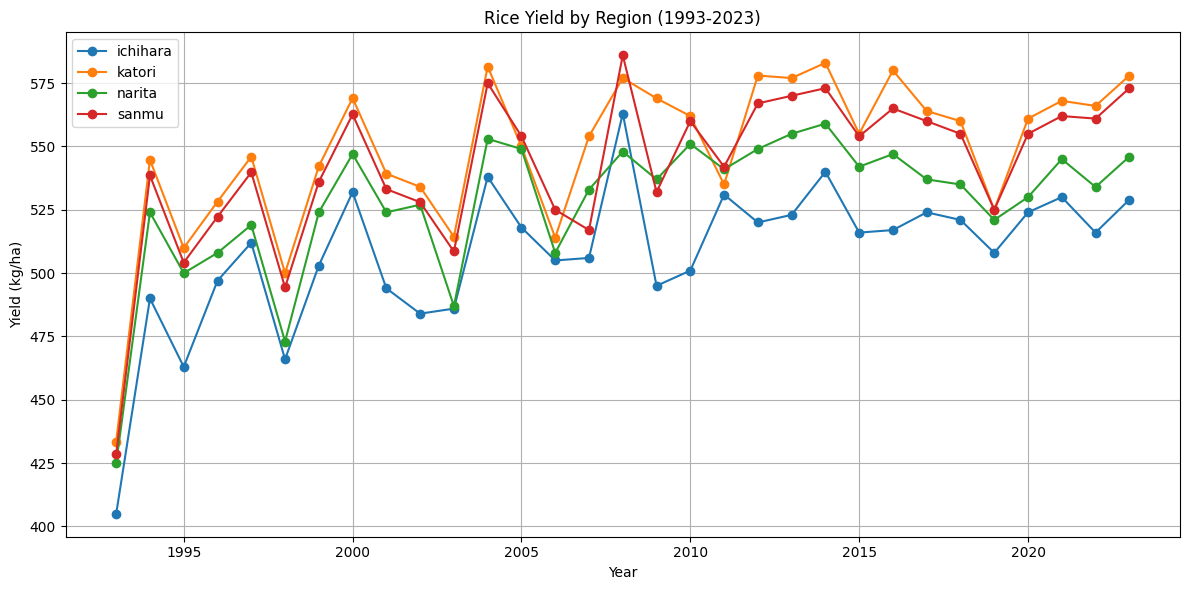

In [70]:

# 7. 地域別の収穫量時系列を可視化
if yield_dfs:
    plt.figure(figsize=(12, 6))
    
    for region, df in yield_dfs.items():
        # カラム名を確認
        year_col = 'Year' if 'Year' in df.columns else 'year'
        yields_col = 'Yields' if 'Yields' in df.columns else 'yields'
        
        plt.plot(df[year_col], df[yields_col], 'o-', label=region)
    
    plt.xlabel('Year')
    plt.ylabel('Yield (kg/ha)')
    plt.title('Rice Yield by Region (1993-2023)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [71]:
combined_data

NameError: name 'combined_data' is not defined